In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/injury-prediction-dataset/injury_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/injury-prediction-dataset/injury_data.csv')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

**TRAINING DATA PRE-PROCESSING**

The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.

As such, data pre-processing addresses:

Assumptions about data shape
Incorrect data types
Outliers or errors
Missing values
Categorical variables

In [4]:
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [5]:
df.tail()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
995,23,99.147910,165.290912,0,0.077857,3,1
996,23,75.799934,178.132281,1,0.955448,1,0
997,20,78.479061,173.823908,0,0.246961,1,1
998,24,66.915802,197.616889,1,0.859645,2,0
999,36,71.847352,177.171535,0,0.168810,1,0


In [6]:
df.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


**Missing Data**

A heatmap will help better visualize what features as missing the most information.

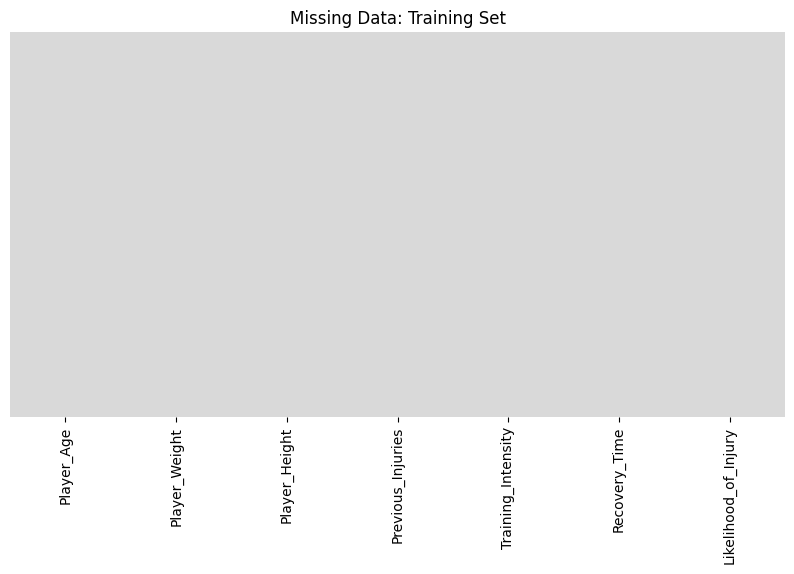

In [8]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [9]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('Likelihood_of_Injury', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = df['Likelihood_of_Injury'] # y is the column we're trying to predict

In [10]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [11]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

# LINEAR REGRESSION

## Model Training

In [12]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

## Model Testing
## Class prediction

In [13]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(100,)
[0.46833967 0.55763671 0.56186167 0.54092527 0.43485218 0.52221289
 0.467164   0.4543322  0.40701473 0.5288165  0.57865229 0.51262747
 0.52247617 0.48396879 0.55439232 0.46880327 0.50652231 0.52552082
 0.50040387 0.53102135 0.44245573 0.53094948 0.49196016 0.6018452
 0.47249079 0.57017172 0.43324612 0.56272753 0.48295569 0.56117276
 0.47536973 0.53004958 0.50961034 0.45007779 0.41140414 0.58733859
 0.5153536  0.49406553 0.5046166  0.48057972 0.53066849 0.49029609
 0.46018305 0.481668   0.49137757 0.39022618 0.42545586 0.54759306
 0.47387912 0.50236409 0.49683043 0.47496231 0.55138802 0.49801128
 0.56622047 0.45031603 0.49605676 0.52667441 0.40545149 0.47968691
 0.45206136 0.53944651 0.55576534 0.43177899 0.49128461 0.4775476
 0.50206723 0.46128786 0.52819227 0.45054745 0.52468717 0.54213063
 0.53668196 0.49591626 0.54058507 0.48771379 0.43535025 0.50084598
 0.51509586 0.55429709 0.47826545 0.49541493 0.51543125 0.46544636
 0.45456473 0.46171752 0.47277704 0.49225644 0.45693056 0

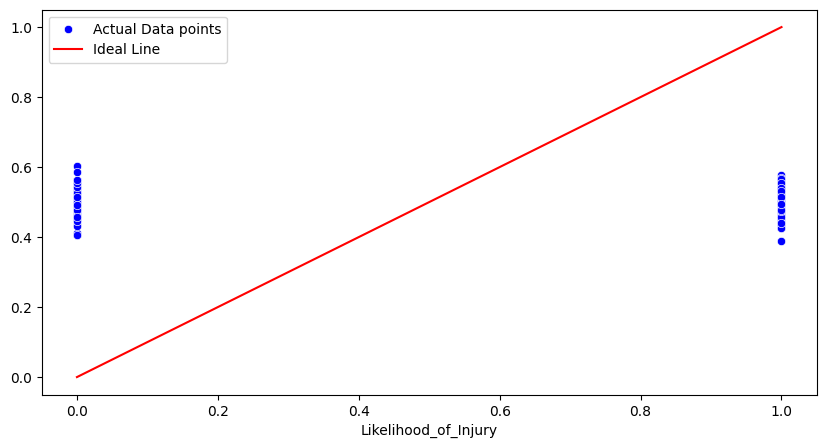

In [14]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [15]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.00 |          0.47
          1.00 |          0.56
          0.00 |          0.56
          1.00 |          0.54
          1.00 |          0.43
          0.00 |          0.52
          0.00 |          0.47
          1.00 |          0.45
          0.00 |          0.41
          0.00 |          0.53
          1.00 |          0.58
          1.00 |          0.51
          1.00 |          0.52
          1.00 |          0.48
          0.00 |          0.55
          1.00 |          0.47
          1.00 |          0.51
          1.00 |          0.53
          0.00 |          0.50
          0.00 |          0.53
          1.00 |          0.44
          1.00 |          0.53
          1.00 |          0.49
          0.00 |          0.60
          1.00 |          0.47
          1.00 |          0.57
          0.00 |          0.43
          0.00 |          0.56
          0.00 |          0.48
          1.00 |          0.56
     

# Residual Analysis

In [16]:
residual = actual- y_pred.reshape(-1)
print(residual)

[0.53166033 0.44236329 0.43813833 0.45907473 0.56514782 0.47778711
 0.532836   0.5456678  0.59298527 0.4711835  0.42134771 0.48737253
 0.47752383 0.51603121 0.44560768 0.53119673 0.49347769 0.47447918
 0.49959613 0.46897865 0.55754427 0.46905052 0.50803984 0.3981548
 0.52750921 0.42982828 0.56675388 0.43727247 0.51704431 0.43882724
 0.52463027 0.46995042 0.49038966 0.54992221 0.58859586 0.41266141
 0.4846464  0.50593447 0.4953834  0.51942028 0.46933151 0.50970391
 0.53981695 0.518332   0.50862243 0.60977382 0.57454414 0.45240694
 0.52612088 0.49763591 0.50316957 0.52503769 0.44861198 0.50198872
 0.43377953 0.54968397 0.50394324 0.47332559 0.59454851 0.52031309
 0.54793864 0.46055349 0.44423466 0.56822101 0.50871539 0.5224524
 0.49793277 0.53871214 0.47180773 0.54945255 0.47531283 0.45786937
 0.46331804 0.50408374 0.45941493 0.51228621 0.56464975 0.49915402
 0.48490414 0.44570291 0.52173455 0.50458507 0.48456875 0.53455364
 0.54543527 0.53828248 0.52722296 0.50774356 0.54306944 0.525776

<Axes: ylabel='Density'>

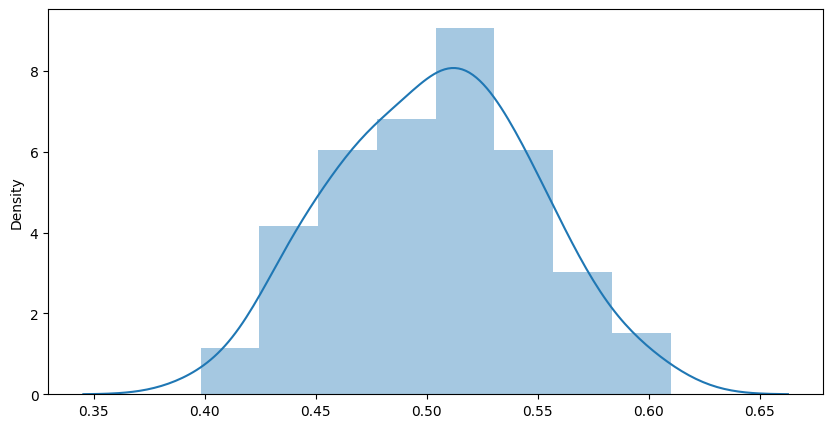

In [17]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

# Linear Regression

# Model Evaluation

In [18]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 0.25194981513594994
Root Mean Squared Error: 0.5019460281105429


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  0.58


# Random Forest

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  0.27094199999999996


# Gradient Boosting Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  0.2758802515799819


# Model Scores

In [22]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 0.25194981513594994,
    "Descison Tree": 0.58,
    "Random Forest":0.265916,
    "Gradient Boosting": 0.2747306963680659
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (lower values are better):
1. Linear Regression: 0.25194981513594994
2. Random Forest: 0.265916
3. Gradient Boosting: 0.2747306963680659
4. Descison Tree: 0.58
